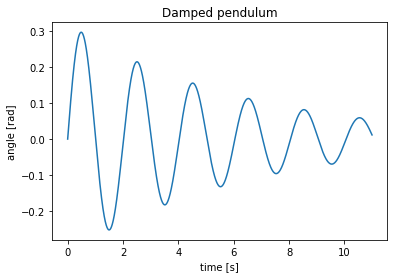

In [36]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle, seed

from echo_state_network import ESN

gamma = 3
damping = 0
K = 12
omega = 4
g = 9.81

def pendulum(u, t):
    #Should return y', y''
    # angle'' = -g/l * sin(angle) - damping * radius / mass * angle'
    
    return (u[1], -9.81 * np.sin(u[0]) - 4 * 0.8 / 10 * u[1])

t = np.linspace(0, 11, 10000)
solution = odeint(pendulum, [0, 1], t)
angle = solution[:,0]

plt.plot(t, angle)
plt.title('Damped pendulum')
plt.xlabel('time [s]')
plt.ylabel('angle [rad]')

indices = list(range(len(t)))
cutoff = int(len(solution) * 0.9)

training_indices = indices[0:cutoff]
validation_indices = indices[cutoff:]

training_input = t[sorted(training_indices)]
training_output = angle[sorted(training_indices)]

validation_input = t[sorted(validation_indices)]
validation_output = angle[sorted(validation_indices)]

harvesting states...
fitting...
training error:
0.0019202792928755521
R^2 evaluation 0.8144713570232484


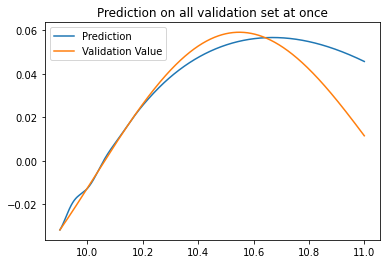

In [37]:
esn = ESN(
    1, 
    1, 
    n_reservoir=2000, 
    spectral_radius=0.8, 
    sparsity=0.3, # number of nodes connected / max number of links 
    noise=0, 
    input_shift=None,
    input_scaling=None, 
    teacher_forcing=True, 
    feedback_scaling=None,
    teacher_scaling=None, 
    teacher_shift=None,
    out_activation=lambda x: np.tanh(x), #tanh, sigmoid
    inverse_out_activation=lambda x: x, #TODO ?
    random_state=None, 
    silent=False
)

esn.fit(training_input, training_output)

prediction = esn.predict(validation_input)[:,0]

plt.plot(validation_input, prediction, validation_input, validation_output)
plt.legend(['Prediction', 'Validation Value'])
plt.title('Prediction on all validation set at once')

def compute_R(predicted_angle, known_angle):
    SS_res = ((predicted_angle - known_angle) ** 2).sum()
    avg = known_angle.mean()
    SS_tot = ((known_angle - avg) ** 2).sum() + 0.0000001
     
    if (SS_tot == 0):
        print('Not good')
        
    return 1 - SS_res / SS_tot

print('R^2 evaluation', compute_R(prediction, validation_output))

0.1
0.2
0.3
0.4
0.5
0.6
0.7000000000000001
0.8
0.8999999999999999
1.0
1.0999999999999999
1.2
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.7999999999999998
1.9
2.0
2.1
2.1999999999999997
2.3
2.4
2.5
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5000000000000004
3.5999999999999996
3.6999999999999997
3.8
3.9
4.0
4.1000000000000005
4.2
4.3
4.3999999999999995
4.5
4.6
4.7
4.8
4.9
5.0
5.1
5.2
5.3
5.4
5.5
5.6000000000000005
5.7
5.800000000000001
5.8999999999999995
6.0
6.1
6.2
6.3
6.4
6.5
6.6000000000000005
6.7
6.800000000000001
6.9
7.000000000000001
7.1
7.199999999999999
7.3
7.3999999999999995
7.5
7.6
7.7
7.8
7.9
8.0
8.1
8.200000000000001
8.3
8.4
8.5
8.6
8.7
8.799999999999999
8.9
9.0
9.1
9.2
9.3
9.4
9.5
9.6
9.700000000000001
9.8
9.9
10.0
10.100000000000001
10.2
10.299999999999999
10.4
10.5
10.6
10.7
10.8
10.9
11.0
11.1
11.200000000000001
11.3
11.4
11.5
11.600000000000001
11.700000000000001
11.799999999999999
11.899999999999999
12.0
12.

98.4
98.5
98.6
98.7
98.8
98.9
99.0
99.1
99.2
99.3
99.4
99.5
99.6
99.7
99.8
99.9
100.0


Text(0, 0.5, 'Error')

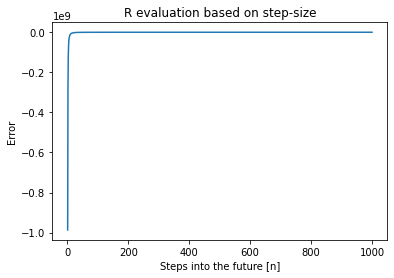

In [38]:
steps = []
R_evaluation = []

temp_prediction = None

#Work in progress
for index in range(1, len(validation_input) + 1):
    steps.append(index)
    
    print(index / len(validation_input) * 100)
    
    temp_prediction = esn.predict(validation_input[0:index])[:,0]
    
    err = compute_R(temp_prediction, validation_input[0:index])
    R_evaluation.append(err)


plt.plot(steps, R_evaluation)
plt.title('R evaluation based on step-size')
plt.xlabel('Steps into the future [n]')
plt.ylabel('Error')

In [ ]:
steps = []
average_error = []

temp_prediction = None

for index in range(1, len(validation_input) + 1):
    steps.append(index)
    
    temp_prediction = esn.predict(validation_input[0:index])[:,0]
    
    err = ((temp_prediction - validation_output[0:index]) ** 2).mean()    
    average_error.append(err)


plt.plot(steps, average_error)
plt.title('Average error based on step-size')
plt.xlabel('Steps into the future [n]')
plt.ylabel('Error')